<a href="https://colab.research.google.com/github/space-debris/Clickstream-Data-for-Online-Shopping/blob/main/Click_stream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import plotly.express as px

Importing dataset

In [ ]:
file ="https://raw.githubusercontent.com/space-debris/Clickstream-Data-for-Online-Shopping/main/e-shop%20clothing%202008.csv"
df = pd.read_csv(file)

In [ ]:
df

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

Data pre-processing



checking for missing value

In [ ]:
total = df.shape[0]
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = df[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

checking for duplicate rows

In [ ]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


feature selection

In [ ]:
df.drop('session ID', axis=1, inplace=True)

In [ ]:
df_copy = pd.read_csv(file)
df_copy=df_copy.drop(['session ID','year'],axis=1)
df_copy

,month,day,order,country,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,4,1,1,29,1,A13,1,5,1,28,2,1
1,4,1,2,29,1,A16,1,6,1,33,2,1
2,4,1,3,29,2,B4,10,2,1,52,1,1
3,4,1,4,29,2,B17,6,6,2,38,2,1
4,4,1,5,29,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
165469,8,13,1,29,2,B10,2,4,1,67,1,1
165470,8,13,1,9,1,A11,3,4,1,62,1,1
165471,8,13,1,34,1,A2,3,1,1,43,2,1
165472,8,13,2,34,3,C2,12,1,1,43,1,1


importing libraries for classification

In [ ]:
import numpy as np #Mengolah matrix
import pandas as pd #Read structured data
import matplotlib.pyplot as plt #Data plot visualization
import seaborn as sns

#Machine Learning
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler  #Feature Scaling
from sklearn.model_selection import train_test_split #Data Partition
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import  RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
from xgboost import plot_importance

#ensembling
from sklearn.ensemble import VotingClassifier

feature selection

In [ ]:
df_copy = pd.read_csv(file)
df_copy=df_copy.drop(['session ID','year'],axis=1)

from sklearn import preprocessing
le=preprocessing.LabelEncoder()
clm=['page 2 (clothing model)']
for x in clm:
    df_copy[x]=le.fit_transform(df_copy[x])

In [ ]:
y = df_copy["price"]
X = df_copy.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 42)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

page 1 (main category)     0.497538
price 2                    0.447099
page 2 (clothing model)    0.329866
colour                     0.216953
location                   0.177935
page                       0.170071
model photography          0.064983
country                    0.010208
month                      0.004855
day                        0.004787
order                      0.002382
dtype: float64

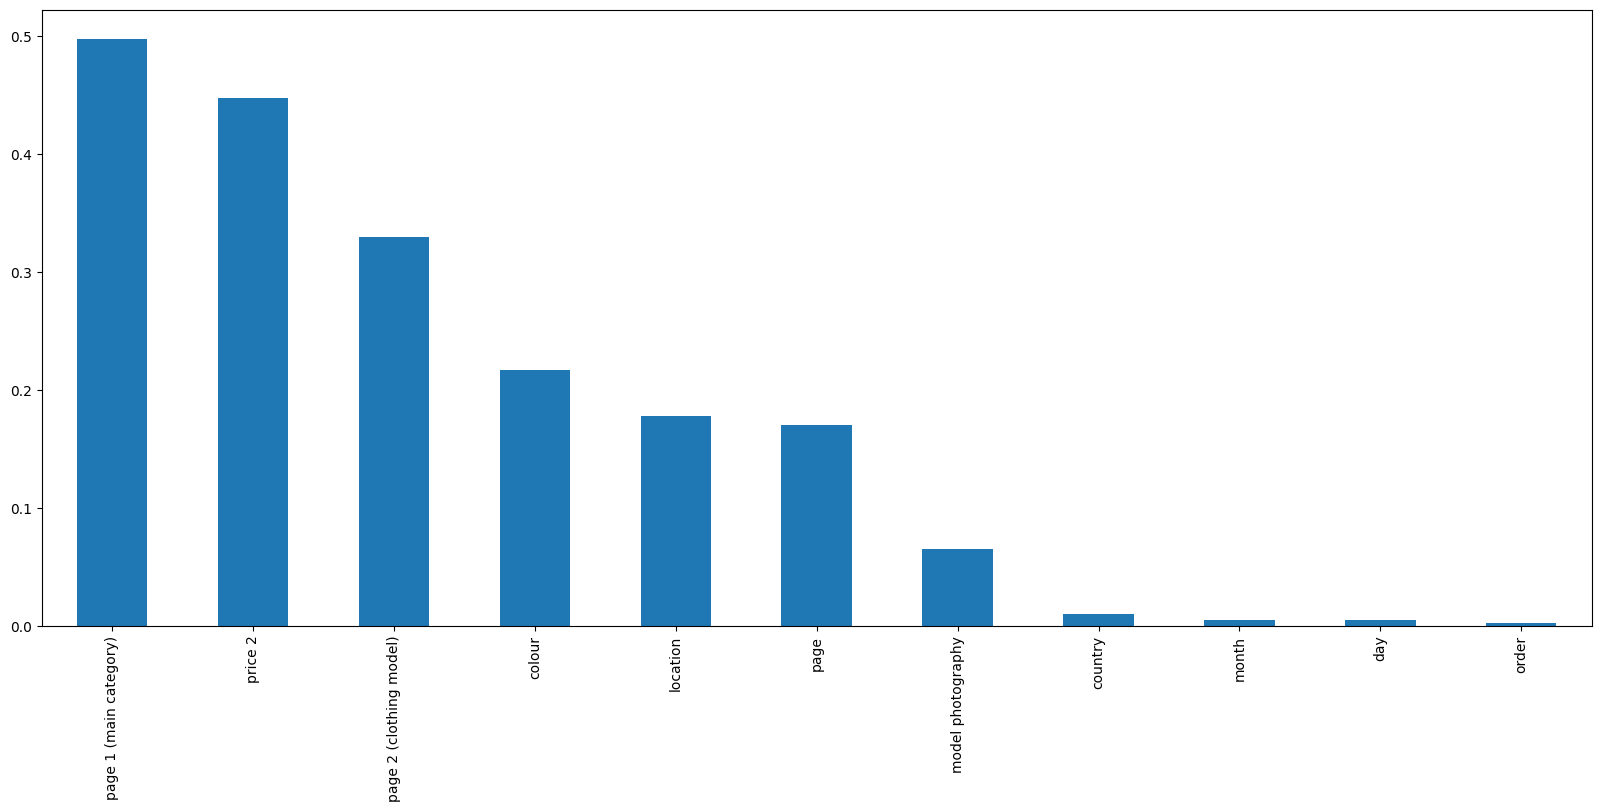

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8));

In [ ]:
# I will choose 6 features to select
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=6)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'price 2', 'page'],
      dtype='object')

In [ ]:
col=['page 1 (main category)', 'page 2 (clothing model)', 'colour','location', 'price 2', 'page']
X_train=X_train[col]
X_test=X_test[col]

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.6 MB/s eta 0:00:00


In [ ]:
import numpy as np #Mengolah matrix
import pandas as pd #Read structured data
import matplotlib.pyplot as plt #Data plot visualization
import seaborn as sns

#Machine Learning
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler  #Feature Scaling
from sklearn.model_selection import train_test_split #Data Partition
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import  RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVC, LinearSVC, SVR, LinearSVR
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from xgboost import XGBClassifier, XGBRegressor
from tabulate import tabulate
#ensembling
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


df_copy = pd.read_csv(file)
df_copy=df_copy.drop(['session ID','year'],axis=1)

from sklearn import preprocessing
encoders = {}
for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df_copy[col] = label_encoder.fit_transform(df_copy[col])
            encoders[col] = label_encoder
df_copy["price 2"] = df_copy["price 2"] - 1

y = df_copy["price 2"]
X = df_copy.drop("price 2",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

accurac=[]
precision=[]
recall=[]

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5,
                                    n_repeats=3,
                                    random_state=999)

Applying KNN

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=4)
KNN_model.fit(X_train[:1000], y_train[:1000])

KNN_train, KNN_test = KNN_model.score(X_train, y_train), KNN_model.score(X_test, y_test)
KNN_predict = KNN_model.predict(X_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Train Score: 0.9256360669607784
Test Score: 0.927738329052727


In [ ]:
KNN_predict = KNN_model.predict(X_test)
accurac.append(accuracy_score(KNN_predict, y_test))
precision.append(precision_score(KNN_predict, y_test))
recall.append(recall_score(KNN_predict, y_test))


print(classification_report(y_test, KNN_predict))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     67836
           1       0.96      0.89      0.92     64544

    accuracy                           0.93    132380
   macro avg       0.93      0.93      0.93    132380
weighted avg       0.93      0.93      0.93    132380



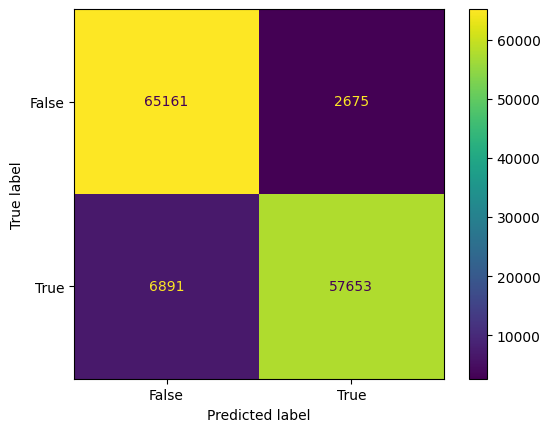

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
predicted = KNN_model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Applying decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}

gs_DT = GridSearchCV(estimator=df_classifier,
                     param_grid=params_DT,
                     cv=cv_method,
                     verbose=1,
                     scoring='accuracy')

gs_DT.fit(X_train, y_train)

Fitting 15 folds for each of 32 candidates, totalling 480 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=DecisionTreeClassifier(random_state=999),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3]},
             scoring='accuracy', verbose=1)

In [ ]:
gs_DT.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

In [ ]:
gs_DT.best_score_

1.0

In [ ]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT.columns

Index(['criterion', 'max_depth', 'min_samples_split', 'test_score'], dtype='object')

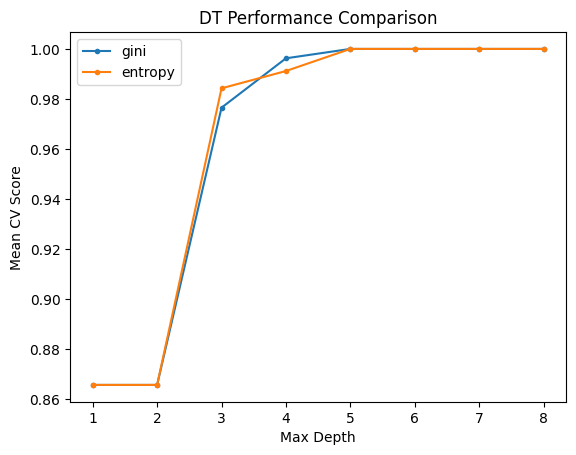

In [ ]:
for i in ['gini', 'entropy']:
    temp = results_DT[results_DT['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)


plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()


predicted=gs_DT.predict(X_test)
accurac.append(accuracy_score(predicted, y_test))
precision.append(precision_score(predicted, y_test))
recall.append(recall_score(predicted, y_test))

In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67836
           1       1.00      1.00      1.00     64544

    accuracy                           1.00    132380
   macro avg       1.00      1.00      1.00    132380
weighted avg       1.00      1.00      1.00    132380



Applying Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

np.random.seed(999)

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb_classifier,
                     param_grid=params_NB,
                     cv=cv_method,
                     verbose=1,
                     scoring='accuracy')

gs_NB.fit(X_train, y_train)

predicted=gs_NB.predict(X_test)
accurac.append(accuracy_score(predicted, y_test))
precision.append(precision_score(predicted, y_test))
recall.append(recall_score(predicted, y_test))

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     67836
           1       0.88      0.97      0.93     64544

    accuracy                           0.92    132380
   macro avg       0.93      0.93      0.92    132380
weighted avg       0.93      0.92      0.92    132380



In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [4,5,6,10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [20,30]
}
# Create a based model
rf = RandomForestClassifier(random_state=12)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = cv_method , n_jobs = -1, verbose = 2)


# Fit the grid search to the data
grid_search.fit(X_train, y_train);

Fitting 15 folds for each of 24 candidates, totalling 360 fits


In [ ]:
best_grid = grid_search.best_estimator_
predicted=grid_search.predict(X_test)
print(accuracy_score(predicted, y_test))

accurac.append(accuracy_score(predicted, y_test))
precision.append(precision_score(predicted, y_test))
recall.append(recall_score(predicted, y_test))

1.0


In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67836
           1       1.00      1.00      1.00     64544

    accuracy                           1.00    132380
   macro avg       1.00      1.00      1.00    132380
weighted avg       1.00      1.00      1.00    132380



In [ ]:
df_copy = pd.read_csv(file)
df_copy=df_copy.drop(['session ID','year'],axis=1)

from sklearn import preprocessing
le=preprocessing.LabelEncoder()
clm=['page 2 (clothing model)']
for x in clm:
    df_copy[x]=le.fit_transform(df_copy[x])



y = df_copy["price 2"]
X = df_copy.drop("price 2",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Applying Logistic Regression

In [ ]:
m1 = 'Logistic Regression'
lr = LogisticRegression(random_state=42)
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_acc_score = accuracy_score( lr_predict,y_test)
print("confussion matrix")
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix


Accuracy of Logistic Regression: 99.82474618412874 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     59384
           2       1.00      1.00      1.00     56448

    accuracy                           1.00    115832
   macro avg       1.00      1.00      1.00    115832
weighted avg       1.00      1.00      1.00    115832



In [ ]:
accurac.append(accuracy_score(lr_predict, y_test))
precision.append(precision_score(lr_predict, y_test))
recall.append(recall_score(lr_predict, y_test))

In [ ]:
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     59384
           2       1.00      1.00      1.00     56448

    accuracy                           1.00    115832
   macro avg       1.00      1.00      1.00    115832
weighted avg       1.00      1.00      1.00    115832



Applying Support vector classifier

In [ ]:
m6 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)



svc_acc_score = accuracy_score(y_test, svc_predicted)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))



Accuracy of Support Vector Classifier: 99.99136680709994 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     59384
           2       1.00      1.00      1.00     56448

    accuracy                           1.00    115832
   macro avg       1.00      1.00      1.00    115832
weighted avg       1.00      1.00      1.00    115832



In [ ]:
print(classification_report(y_test, svc_predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     59384
           2       1.00      1.00      1.00     56448

    accuracy                           1.00    115832
   macro avg       1.00      1.00      1.00    115832
weighted avg       1.00      1.00      1.00    115832



In [ ]:
accurac.append(accuracy_score(svc_predicted, y_test))
precision.append(precision_score(svc_predicted, y_test))
recall.append(recall_score(svc_predicted, y_test))

In [ ]:
# import pandas as pd
import pandas as pd

# List1
lst = [accurac,precision,recall]

d = pd.DataFrame({"accuracy":accurac,"preision":precision,"recall":recall},index=["K Nearest Neighbours",
"Decision Tree",
"Naive Bayes",
"Random Forest Classifier",
"Logistic Regression",
"Support Vector Machine"])

d

,accuracy,preision,recall
K Nearest Neighbours,0.927738,0.893236,0.955659
Decision Tree,1.000000,1.000000,1.000000
Naive Bayes,0.923931,0.974544,0.881856
Random Forest Classifier,1.000000,1.000000,1.000000
Logistic Regression,0.998247,0.996582,1.000000
Support Vector Machine,0.999914,0.999882,0.999949


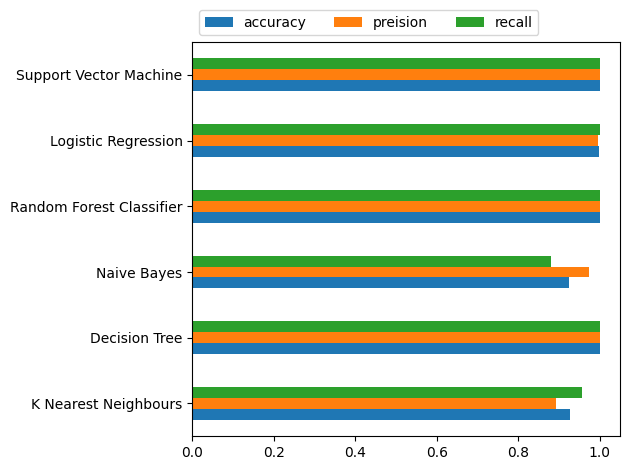

In [ ]:
ax = d.plot.barh()
ax.legend(
    ncol=6,
    bbox_to_anchor=(0, 1),
    loc='lower left',
    prop={'size': 10}
)
plt.tight_layout()